# IPO date from Compustat

--------

In [1]:
import wrds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Get Company file from COMPUSTAT

In [3]:
df= conn.raw_sql("""select * 
                    from comp.company
                    """,
                  date_cols=['datadate'])
df.shape

(51827, 39)

In [6]:
df= df[['conm', 'gvkey', 'cik', 'fic', 'sic', 'state', 'ipodate']]
df=df.dropna(subset=['sic'])
print(df.shape)
df.head()

(50593, 7)


,conm,gvkey,cik,fic,sic,state,ipodate
0,A & E PLASTIK PAK INC,001000,None,USA,3089,None,None
1,A & M FOOD SERVICES INC,001001,0000723576,USA,5812,OK,None
2,AAI CORP,001002,0001306124,USA,3825,MD,None
3,A.A. IMPORTING CO INC,001003,0000730052,USA,5712,MO,None
4,AAR CORP,001004,0000001750,USA,5080,IL,1988-01-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50593 entries, 0 to 51826
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   conm     50593 non-null  object
 1   gvkey    50593 non-null  object
 2   cik      35327 non-null  object
 3   fic      50356 non-null  object
 4   sic      50593 non-null  object
 5   state    44885 non-null  object
 6   ipodate  15824 non-null  object
dtypes: object(7)
memory usage: 3.1+ MB


### Classify industry

In [8]:
df['sic']= df['sic'].astype(int)
df.loc[((df['sic']<7000) & (df['sic']>=6000)), 'industry']= 'finance'
df.loc[df['sic']>=9900, 'industry']= 'not defined'
df.loc[(df['industry'].isna()), 'industry']= 'non-finance'
df.head()

,conm,gvkey,cik,fic,sic,state,ipodate,industry
0,A & E PLASTIK PAK INC,001000,None,USA,3089,None,None,non-finance
1,A & M FOOD SERVICES INC,001001,0000723576,USA,5812,OK,None,non-finance
2,AAI CORP,001002,0001306124,USA,3825,MD,None,non-finance
3,A.A. IMPORTING CO INC,001003,0000730052,USA,5712,MO,None,non-finance
4,AAR CORP,001004,0000001750,USA,5080,IL,1988-01-01,non-finance


In [9]:
df.groupby('industry').count()

,conm,gvkey,cik,fic,sic,state,ipodate
industry,,,,,,,
finance,14313,14313,6918,14080,14313,13475,2837
non-finance,34437,34437,27033,34435,34437,29807,11743
not defined,1843,1843,1376,1841,1843,1603,1244


### Keep US firm only

In [11]:
df=df[df.fic=="USA"].drop(columns="fic")
print(df.shape)

(38262, 7)


In [12]:
df=df[df.ipodate.notna()]
print(df.shape)

(12111, 7)


In [13]:
df.groupby('industry').count()

,conm,gvkey,cik,sic,state,ipodate
industry,,,,,,
finance,2306,2306,2181,2306,2294,2306
non-finance,9016,9016,8545,9016,8897,9016
not defined,789,789,596,789,767,789


### Define IPO year

In [17]:
df['ipoyear']= pd.DatetimeIndex(df['ipodate']).year

In [14]:
df.shape

(12111, 7)

-----------

### Histogram using the full sample

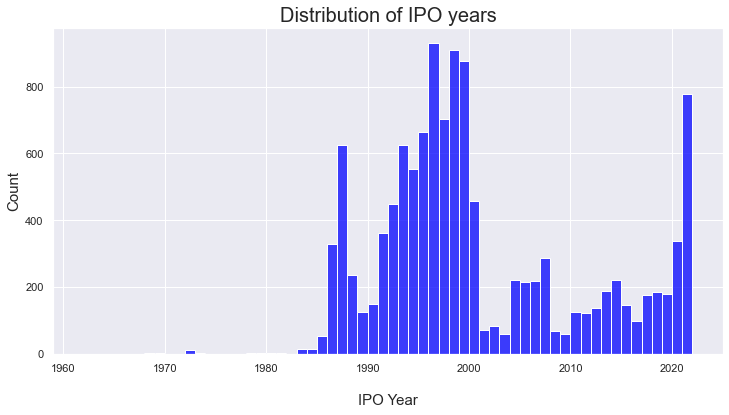

In [18]:
sns.set(rc={'figure.figsize':(12, 6)})
ax= sns.histplot(df, x='ipoyear', binwidth= 1, color= 'blue')
ax.set_title("Distribution of IPO years", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)

plt.show()

### Histogram using the sample since 1990

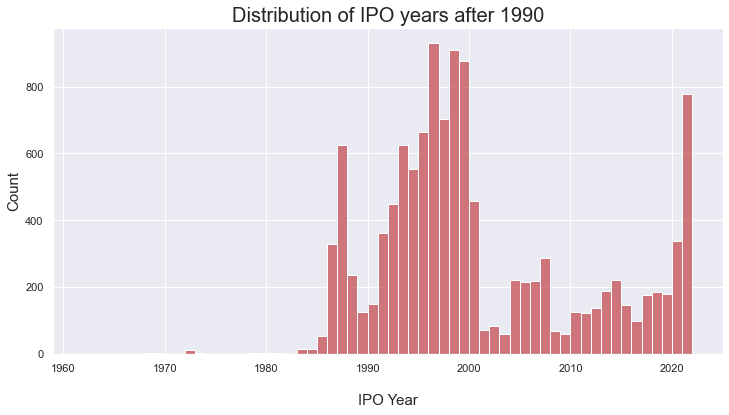

In [19]:
df_to_visualize= df[df['ipoyear']>=1990]

sns.set(rc={'figure.figsize':(12, 6)})
ax= sns.histplot(df, x='ipoyear', binwidth= 1, color= 'r')
ax.set_title("Distribution of IPO years after 1990", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)
plt.show()

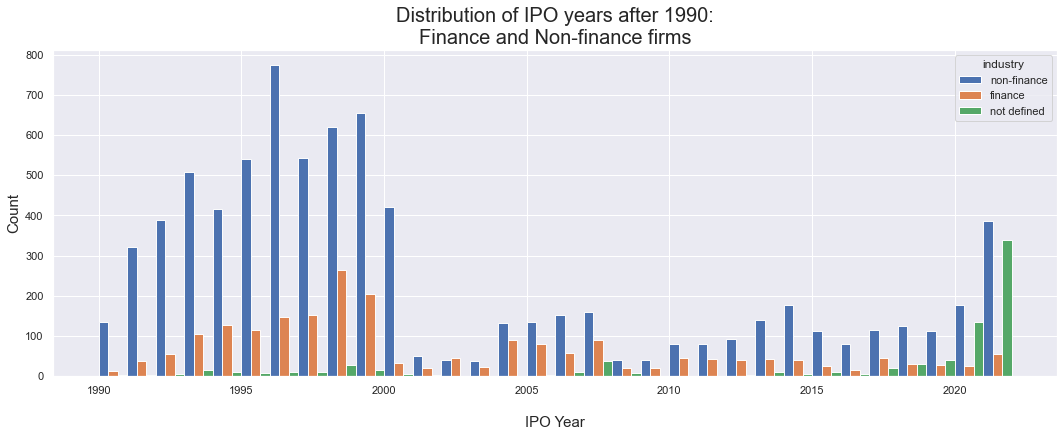

In [20]:
df_to_visualize= df[df['ipoyear']>=1990]

sns.set(rc={'figure.figsize':(18, 6)})
ax= sns.histplot(df_to_visualize, 
                 x='ipoyear', binwidth= 1, hue='industry', alpha= 1, multiple='dodge')
ax.set_title("Distribution of IPO years after 1990:\nFinance and Non-finance firms", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_ylabel("Count", fontsize= 15)
plt.show()

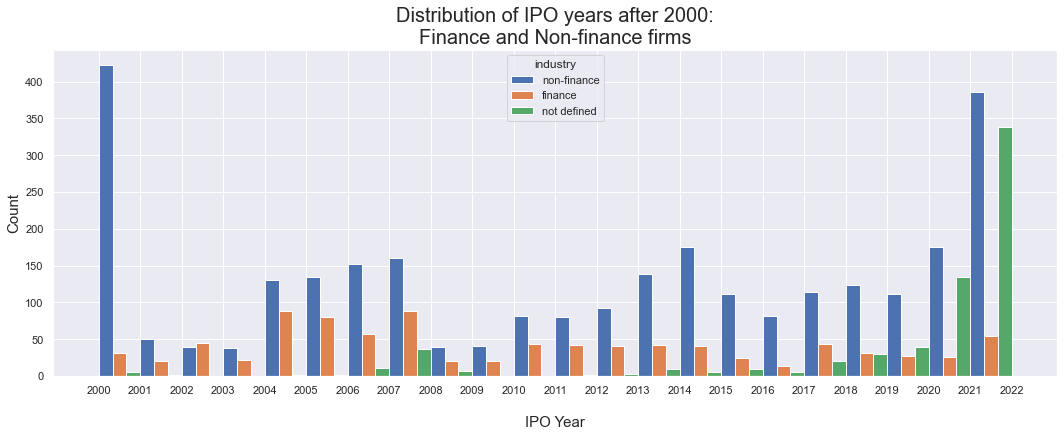

In [24]:
df_to_visualize= df[df['ipoyear']>=2000]

sns.set(rc={'figure.figsize':(18, 6)})
ax= sns.histplot(df_to_visualize, 
                 x='ipoyear', binwidth= 1, hue='industry', alpha= 1, multiple='dodge')
ax.set_title("Distribution of IPO years after 2000:\nFinance and Non-finance firms", fontsize= 20)
ax.set_xlabel("\nIPO Year", fontsize= 15)
ax.set_xticks(range(2000,2023))
ax.set_ylabel("Count", fontsize= 15)
plt.show()

In [ ]:
conn.close()

--------